#  1-a)gradient descent where η = 1e−10 

iter=1000 error=1.532486413791927e-05
[b0 b1 b2]=[[0.99977433 0.99919208 0.98443628]]

iter=2000 error=1.4816074049740996e-05
[b0 b1 b2]=[[0.99956452 0.9984417  0.96938767]]

iter=3000 error=1.4324313105535594e-05
[b0 b1 b2]=[[0.99937005 0.99774695 0.954837  ]]

iter=4000 error=1.3849016011350436e-05
[b0 b1 b2]=[[0.99919039 0.99710596 0.94076766]]

iter=5000 error=1.3389636393230324e-05
[b0 b1 b2]=[[0.99902506 0.99651693 0.92716362]]

iter=6000 error=1.2945646168826412e-05
[b0 b1 b2]=[[0.99887357 0.99597814 0.91400937]]

iter=7000 error=1.2516534939993054e-05
[b0 b1 b2]=[[0.99873546 0.99548789 0.90128991]]

iter=8000 error=1.2101809405670024e-05
[b0 b1 b2]=[[0.9986103  0.99504458 0.88899075]]

iter=9000 error=1.1700992794371167e-05
[b0 b1 b2]=[[0.99849763 0.99464663 0.87709788]]

iter=10000 error=1.1313624315623275e-05
[b0 b1 b2]=[[0.99839705 0.99429252 0.86559776]]

iter=11000 error=1.0939258629719193e-05
[b0 b1 b2]=[[0.99830816 0.9939808  0.8544773 ]]

iter=12000 error=1.057746533517

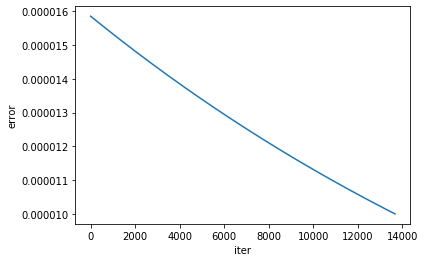

---------------------------------------------
[b0 b1 b2]=[[0.99812504 0.99334528 0.8265406 ]]
sse=136560.54384644926
error=9.999836073692512e-06


In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


csv_data = pandas.read_csv('MEAP93.csv')
col_list = ["lnchprg", "math10","expend"]
df = pandas.read_csv("MEAP93.csv", usecols=col_list)
import math

expend=df["expend"]
lnchprg=df["lnchprg"]
math10=df["math10"]
X=np.array([np.array([1]*408),np.log10(df["expend"]),df["lnchprg"]])
X=X.T
Y=np.array([math10])
Y=Y.T
def grad(w,learning_rate):
    return learning_rate*(X.T.dot(Y-X.dot(w)))
#利用矩陣算出梯度的值
def train(b,learning_rate):
    error_history = []
    iter = 0
    while 1:
        iter +=1
        b_prev = b.copy()
        g = grad(b,learning_rate)
        b += g
        #b = update_w(b,learning_rate)
        error = np.linalg.norm(g, ord=2, axis=None)
        error_history.append(error)
        #print(error)
        if iter %1000 ==0 :
            print("iter={:d} error={:}".format(iter,error))
            print("[b0 b1 b2]={0}\n".format(b.T)) 
        #顯示每1000次的狀態

        if error < 10 ** -5 :
            print("iter={:d} error={:}".format(iter,error))
            break
            #當誤差小於10**-5 break
        if error > 10 :
            print("shutdown!")
            break
             #當誤差太大強制停止並 break
    return b,error,error_history

b = np.ones((3,1))
error_history = []
b,error,error_history= train(b, 10 ** -10 )
#當學習率=10*
plt.plot(error_history)
plt.xlabel("iter")
plt.ylabel("error")
plt.show()

math10_optimal = np.dot(X,b)
sse = np.linalg.norm(math10_optimal - Y, ord=2) ** 2
#計算sse的大小
print("---------------------------------------------\n[b0 b1 b2]={0}".format(b.T))
print("sse={0}".format(sse))
print("error={0}".format(error))

#  1-b)gradient descent where η = 1e−5 

iter=1 error=1.5850732832152075
[b0 b1 b2]=[[ 0.9766227   0.91626818 -0.58268752]]

iter=2 error=3.782691207528827
[b0 b1 b2]=[[1.11731773 1.42777316 3.16261892]]

iter=3 error=9.038648492535161
[b0 b1 b2]=[[ 0.86475255  0.51252984 -5.82602431]]

iter=4 error=21.6023132616883
[b0 b1 b2]=[[ 1.55102235  3.00333866 15.62123294]]

iter=5 error=51.631302534866165
[b0 b1 b2]=[[-7.69964207e-03 -2.65062549e+00 -3.56758866e+01]]

iter=6 error=123.40383077187431
[b0 b1 b2]=[[ 3.798266   11.15831961 86.89382051]]

iter=7 error=294.94746545849256
[b0 b1 b2]=[[  -5.21896368  -21.55490387 -206.09515873]]

iter=8 error=704.9539935880924
[b0 b1 b2]=[[ 16.41148927  56.92070772 494.14325421]]

iter=9 error=1684.910727526167
[b0 b1 b2]=[[  -35.21011918  -130.35990997 -1179.5309493 ]]

iter=10 error=4027.105599347444
[b0 b1 b2]=[[  88.24703184  317.53979665 2820.68450652]]

iter=11 error=9625.186223866973
[b0 b1 b2]=[[ -206.75260922  -752.70883398 -6740.26486708]]

iter=12 error=23005.160300112988
[b0 b1 

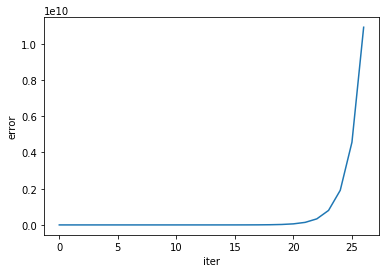

-------------------------------------
[b0 b1 b2]=[[-2.35893209e+08 -8.55813285e+08 -7.64472949e+09]]
sse=2.007954734270278e+25
error=10916090025.3102


In [2]:
def update_w(b,learning_rate):
    b_d = np.zeros((3,1))
    for i in range(408):
        b_d[0] += 2*b[0] + 2*b[1]*np.log10(expend[i]) + 2*b[2]*lnchprg[i] - 2*math10[i]
        b_d[1] += -2*np.log10(expend[i])*(-b[0] - b[1]*np.log10(expend[i]) - b[2]*lnchprg[i] + math10[i])
        b_d[2] += -2*lnchprg[i]*(-b[0] - b[1]*np.log10(expend[i]) - b[2]*lnchprg[i] + math10[i])   
    for i in range(3):
        b[i] -= ( b_d[i] / 408 )*learning_rate
    return b
def train(b,learning_rate):
    error_history = []
    iter = 0
    while 1:
        iter +=1
        b_prev = b.copy()
        g = grad(b,learning_rate)
        b += g
        #b = update_w(b,learning_rate)
        error = np.linalg.norm(g, ord=2, axis=None)
        error_history.append(error)
        #print(error)
        print("iter={:d} error={:}".format(iter,error))
        print("[b0 b1 b2]={0}\n".format(b.T)) 
        
        if error < 10 ** -5 :
            break
        if error > 10 ** 10 :
            print("shutdown!")
            break
        
    return b,error,error_history


error_history=[]
b = np.ones((3,1))
b,error,error_history = train(b, 10 ** -5 )
math10_optimal = np.dot(X,b)

plt.plot(error_history)
plt.xlabel("iter")
plt.ylabel("error")
plt.show()

sse = np.linalg.norm(math10_optimal - Y, ord=2) ** 2
print("-------------------------------------\n[b0 b1 b2]={0}".format(b.T))
print("sse={0}".format(sse))
print("error={0}".format(error))

#  Load Data from MNIST

5.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
  

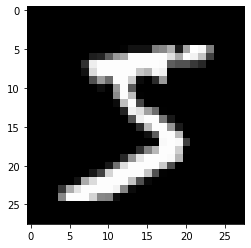

0.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
  

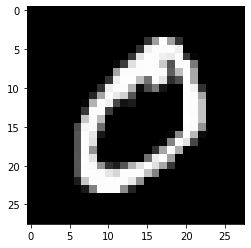

4.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  67. 232.  39.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  62.  81.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 120. 180.  39.   0.   0.   0.   0.   0.
  

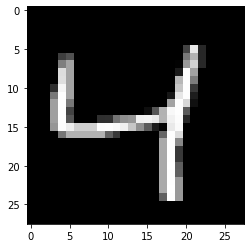

1.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 124. 253. 255.  63.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  96. 244. 251. 253.  62.   0.   0.   0.   0.   0.   0.
  

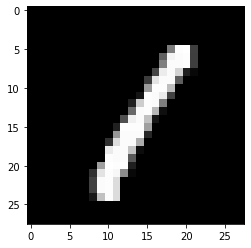

9.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  

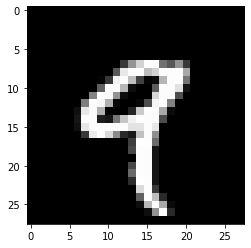

2.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  13.  25. 100. 122.   7.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  33.
 151. 208. 252. 252. 252. 146.   0.   0.   0.   0.   0.   0.   0.   0.
  

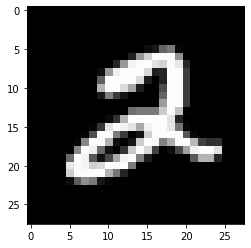

1.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 145. 255.
 211.  31.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  32. 237. 253.
 252.  71.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  11. 175. 253.
 252.  71.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  

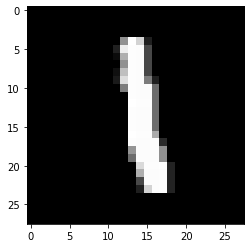

3.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.  43. 105.
 255. 253. 253. 253. 253. 253. 174.   6.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  43. 139. 224. 226. 252.
 253. 252. 252. 252. 252. 252. 252. 158.  14.   0.   0.   0.   0.   0.
  

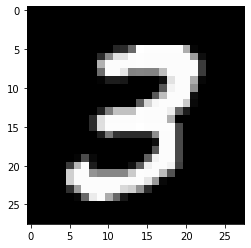

1.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.  63.
 197.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  20. 254.
 230.  24.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  

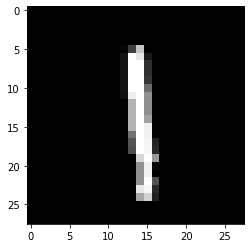

4.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 189. 190.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 143. 247. 153.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 136. 247. 242.  86.   0.   0.   0.   0.
  

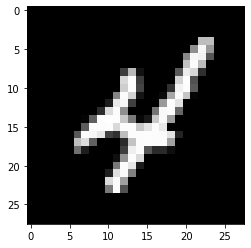

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt

train_images_idx3_ubyte_file = 'MNIST_data/train-images.idx3-ubyte'
train_labels_idx1_ubyte_file = 'MNIST_data/train-labels.idx1-ubyte'
test_images_idx3_ubyte_file = 'MNIST_data/t10k-images.idx3-ubyte'
test_labels_idx1_ubyte_file = 'MNIST_data/t10k-labels.idx1-ubyte'

def decode_idx3_ubyte(idx3_ubyte_file):

    bin_data = open(idx3_ubyte_file, 'rb').read()
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)

    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header) 
    fmt_image = '>' + str(image_size) + 'B'  
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)

    return images


def decode_idx1_ubyte(idx1_ubyte_file):

    bin_data = open(idx1_ubyte_file, 'rb').read()
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    #print('magic_number:%d, images: %d' % (magic_number, num_images))

    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    return decode_idx1_ubyte(idx_ubyte_file)

def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    return decode_idx3_ubyte(idx_ubyte_file)

def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    return decode_idx1_ubyte(idx_ubyte_file)

if __name__ == '__main__':
    train_images = load_train_images()
    train_labels = load_train_labels()
    
    test_images = load_test_images()
    test_labels = load_test_labels()
    for i in range(10):
        print(train_labels[i])
        print(train_images[i].ravel())
        plt.imshow(train_images[i], cmap='gray')
        plt.pause(0.000001)
        plt.show()


#  2) Use 1NN,KNN,SVM,KDE to Train & Predict

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import datetime


train_size=20000
test_size=1000

trainData = [[0 for _ in range(784)] for _ in range(train_size)]
testData = [[0 for _ in range(784)] for _ in range(train_size)]

trainData=train_images
testData=test_images
trainLabels=train_labels
testLabels=test_labels


row = (np.size(trainData, 0))
colomn = ((np.size(trainData, 1)) * (np.size(trainData, 2)))
trainData = trainData.reshape((row, colomn))
row = np.size(testData, 0)
testData = testData.reshape((row, colomn))

def KNN(K, trainData, trainLabels, testData, testLabels):
    print("KNN k=",K)
    starttime = datetime.datetime.now()
    
    
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(trainData[:train_size], trainLabels[:train_size])
    
    endtime = datetime.datetime.now()
    print ("Train time(sec):",(endtime - starttime).seconds)
    
    starttime = datetime.datetime.now()
    test_predict = knn.predict(testData[:test_size])
    endtime = datetime.datetime.now()
    print ("Test time(sec):",(endtime - starttime).seconds)
    a = metrics.accuracy_score(testLabels[:test_size], test_predict)
    print("Accuracy = ", a )
    
    return

def SVM(trainData, trainLabels, testData, testLabels):
    print("SVM Linear")
    
    starttime = datetime.datetime.now()
    svm = SVC(kernel='linear')
    svm.fit(trainData[:train_size], trainLabels[:train_size])
    
    endtime = datetime.datetime.now()
    print ("Train time(sec):",(endtime - starttime).seconds)
    
    starttime = datetime.datetime.now()
    test_predicted = svm.predict(testData[:test_size])
    endtime = datetime.datetime.now()
    print ("Test time(sec):",(endtime - starttime).seconds)
    
    a = metrics.accuracy_score(testLabels[:test_size], test_predicted)
    print("Accuracy = ",a)

    return

def KDE(trainData, trainLabels, testData, testLabels):
    print("KDE :")
    num_0 = []
    num_1 = []
    num_2 = []
    num_3 = []
    num_4 = []
    num_5 = []
    num_6 = []
    num_7 = []
    num_8 = []
    num_9 = []
    
    for i in range(train_size):
        if trainLabels[i] == 0:
            num_0.append(trainData[i])
        if trainLabels[i] == 1:
            num_1.append(trainData[i])
        if trainLabels[i] == 2:
            num_2.append(trainData[i])
        if trainLabels[i] == 3:
            num_3.append(trainData[i])
        if trainLabels[i] == 4:
            num_4.append(trainData[i])
        if trainLabels[i] == 5:
            num_5.append(trainData[i])
        if trainLabels[i] == 6:
            num_6.append(trainData[i])
        if trainLabels[i] == 7:
            num_7.append(trainData[i])
        if trainLabels[i] == 8:
            num_8.append(trainData[i])
        if trainLabels[i] == 9:
            num_9.append(trainData[i])
    
    bd = np.std(trainData,ddof = 1 )*(train_size ** -1/5)
    print("bandwidth = ",bd)
    starttime = datetime.datetime.now()

    kde_0_9 = []
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_0)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_1)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_2)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_3)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_4)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_5)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_6)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_7)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_8)))
    kde_0_9.append(KernelDensity(kernel='gaussian',bandwidth = bd).fit(np.array(num_9)))
    t = []
    endtime = datetime.datetime.now()
    print ("Train time(sec):",(endtime - starttime).seconds)
    test_predicted = []
    starttime = datetime.datetime.now()
    for i in range(test_size):
        for j in range(10):
            t.append(kde_0_9[j].score_samples(testData[i].reshape(1, -1)))
            #print(kde_0_9[j].score_samples(testData[i].reshape(1, -1)))
        test_predicted.append(t.index(max(t)))
        
        t.clear()
    endtime = datetime.datetime.now()
    print ("Test time(sec):",(endtime - starttime).seconds)   
    test_predicted = np.array(test_predicted).reshape(-1, 1)
    a = metrics.accuracy_score(testLabels[:test_size], test_predicted)
    print("Accuracy = ",a)
    return





KNN(1, trainData, trainLabels, testData, testLabels)
KNN(5, trainData, trainLabels, testData, testLabels)
print("")
SVM(trainData, trainLabels, testData, testLabels)
print("")
KDE(trainData, trainLabels, testData, testLabels)

KNN k= 1
Train time(sec): 10
Test time(sec): 39
Accuracy =  0.939
KNN k= 5
Train time(sec): 9
Test time(sec): 38
Accuracy =  0.937

SVM Linear
Train time(sec): 76
Test time(sec): 5
Accuracy =  0.91

KDE :
bandwidth =  0.0007856749081851164
Train time(sec): 3
Test time(sec): 25
Accuracy =  0.421
